# 梯度下降

之前我们提到的多重共线性的问题，其中一个解决办法就是改变原来的模型，将模型的先觉条件放松后，才有了其他的解决办法。但是对一些复杂的模型来说，放宽条件更改模型的做法很复杂。所以就有了梯度下降的方法。

该方法可以说是一种贪心算法。是一个最优化算法，通常也称 最速下降法，常用于机器学习和人工智能中递归性逼近最小偏差模型，梯度下降的方向就是用负梯度方向为搜索方向，沿着梯度下降的方向求解极小值。在训练过程中，每次的正向传播都会得到输出值和真实值的损失值，这个损失值越小，代表模型越好，于是梯度下降的算法就用在这里，帮助寻找最小的那个损失值。

![](Images/GD_small_step.png)

## 1 梯度下降详解

引用机器学习使用指南里的一句话来解释梯度下降。

> ‘假设浓雾下，你迷失在了大山中，你只能感受到自己脚下的坡度。为了最快到达山底，一个最好的方法就是沿着坡度最陡的地方下山。这其实就是梯度下降所做的：它计算误差函数关于参数向量$\theta$的局部梯度，同时它沿着梯度下降的方向进行下一次迭代。当梯度值为零的时候，就达到了误差函数最小值 。’

算法的过程，在一开始，要选一个初始的$\theta$，然后定义一个步长，来一点一点的改变我们的$\theta$值，直到SSE达到一个最小值。如下图。

![DirTree](./Images/GD_normal_step.png)
    
从上面的图中我们可以看到，Cost是Y轴，$\theta$x轴，简单的来说Cost是一个$\theta$的函数。这里我们可以看出我们选了一个随机的起始点，然后根据步长。一步一步的在降低cost的值，一直到最底端。

步数的大小也是我们自己定义的。步数可大可小。

![DirTree](./Images/GD_small_step.png)

上图中，可以看出我们的步数很小的时候，则达到最低端的时间会更加的长，但是由于步长小，所以最后的结果精确度很高，并且非常接近global minimal。

![DirTree](./Images/GD_Large_step.png)

上图则是步数比较大的时候的情况，虽然会很快的接近global minimal, 但是由于步数太大，大概率的情况下最后的结果不够精确。

那上面的情况是基于cost函数是一个convex函数，也就是说它只有一个全局最优点，也就是global minimal。比如说，我们的最小2乘来求回归问题的cost函数(多维)就是一个典型的convex函数，也就是只有一个最优点。后面我们的做梯度下降的练习也还是围绕着回归来做。

但是真实的生活中，我们会涉及到其他很多的损失函数。这些损失函数大多数都是不规则的函数，有多个局部最优(local minimal)和一个全局最优(gloabl minial)。比如下面的图。

![DirTree](./Images/GD_local_global_min.png)

那在这个损失函数中，我们可以看到，如果选左边的点为起始点，最后很可能就陷入一个local minimal中出不来了。假如从右边的点作为起始点。则我们可能会达到全局最优点。

在使用梯度下降的时候，需要做的是要抱他所有的特征有着相近的尺度范围。也就是说，如果有的特征是以100为单位的，有的特征是以1为单位的，如果不做归一化处理的话，并且选取步长为0.1的话，以100为单位的特征需要很长时间才能达到真实的点。这样会拖累整个迭代用的时间。如果做了归一化处理的话，所有的特征值都可能是0到1的范围内，用0.1作为步长的话，很是合理。

## 1 梯度下降的详细算法

1. 先决条件： 确认优化模型的假设函数和损失函数。比如对多元的线性回归来说，我们的损失函数就是最小二乘法的那个函数。

$$MSE = \frac{1}{n}(Y - X\theta)^T(Y - X\theta)$$

2. 选取一个初始化的参数值，比如说$\theta = (0,0,...,0)$。然后选取一个步长$\lambda = 0.1$

3. 根据损失函数算出偏微分$\nabla$

$$
\nabla MSE(\theta) = 
\left[ \begin{matrix} 
\frac{dMSE(\theta)}{d \theta_{0}} \\ 
\frac{dMSE(\theta)}{d \theta_{1}} \\ 
\vdots \\ 
\frac{dMSE(\theta)}{d \theta_{p}} 
\end{matrix} \right] = \frac{2}{n}X^T(X\theta-Y)
$$

4. 更新$\theta$直到$\theta$收敛

$$\theta = \theta - \lambda \nabla MSE(\theta) = \theta - \lambda \frac{2}{n}X^T(X\theta-Y)$$


## 2 梯度下降算法种类

### 2.1 批量梯度下降法（Batch Gradient Descent）
批量梯度下降法，是梯度下降法最常⽤的形式，具体做法也就是在更新参数时使⽤所有的样本来进⾏更新。也就是说下列的X和Y用的就是整个数据集。

$$\theta = \theta - \lambda \frac{2}{n}X^T(X\theta-Y)$$

### 2.2 随机梯度下降法（Stochastic Gradient Descent）
随机梯度下降法，其实和批量梯度下降法原理类似，区别在与求梯度时没有⽤所有的m个样本的数⽽是仅仅选取⼀个样本j来求梯度。对应的更新公式是：

$$\theta = \theta - \lambda X_{j}^T (X_{j}\theta - y_{i})$$

随机梯度下降和批量梯度下降法是两个极端，⼀个采⽤所有数据来梯度下降，⼀个⽤⼀个样本来梯度下降。⾃然各⾃的优缺点都⾮常突出。对于训练速度来说，随机梯度下降法由于每次仅仅采⽤⼀个样本来迭代，训练速度很快，⽽批量梯度下降法在样本量很⼤的时候，训练速度不能让⼈满意。对于准确度来说，随机梯度下降法⽤于仅仅⽤⼀个样本决定梯度⽅向，导致解很有可能不是最优。对于收敛速度来说，由于随机梯度下降法⼀次迭代⼀个样本，导致迭代⽅向变化很⼤，不能很快的收敛到局部最优解。 但值得⼀提的是，随机梯度下降法在处理⾮凸函数优化的过程当中有⾮常好的表现，由于其下降⽅向具有⼀定随机性，因此能很好的绕开局部最优解，从⽽逼近全局最优解。

那么，有没有⼀个中庸的办法能够结合两种⽅法的优点呢？有，⼩批量梯度下降法。

### 2.3 ⼩批量梯度下降法（Mini-batch Gradient Descent）

⼩批量梯度下降法是批量梯度下降法和随机梯度下降法的折衷，也就是对于n个样本，我们采⽤m个样⼦来迭代。一般m=10即可，或者可以用0.1 * n。所以下面的公式里的每次迭代的时候用的X和Y就不是全部的样本，而是其中一小部分的数据。

在每个迭代之前，去10个数据, 假设X是DataFrame，Y是对应的array

X = X.sample(frac = 0.1, replace = False)

Y = Y[X.index]

$$\theta = \theta - \lambda \frac{2}{n}X^T(X\theta-Y)$$


## 3 梯度下降法python实现

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#导入数据
aba = pd.read_csv('abalone.txt', header = None, sep = '\t')
X = aba.iloc[:,:-1]
Y = aba.iloc[:,-1]


#数据的标准化


In [2]:
#使用preprocessing的包
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
aba = std.fit_transform(aba)

X = aba[:,:-1]
Y = aba[:,-1]

X = np.hstack((np.ones((X.shape[0], 1)), X))
X = np.mat(X)
Y = np.mat(Y).T

$$\theta = \theta - \lambda \frac{2}{n}X^T(X\theta-Y)$$

In [7]:
(X.T * X).I * X.T * Y

matrix([[ 2.60208521e-18],
        [ 1.62405960e-02],
        [-5.87476441e-02],
        [ 4.13082872e-01],
        [ 1.53916438e-01],
        [ 1.40697920e+00],
        [-1.39621019e+00],
        [-3.31854604e-01],
        [ 3.70463832e-01]])

In [8]:
theta

matrix([[-1.13028076e-16],
        [ 1.62353759e-02],
        [-5.89316545e-02],
        [ 4.13201610e-01],
        [ 1.53922116e-01],
        [ 1.40011347e+00],
        [-1.39320638e+00],
        [-3.30202806e-01],
        [ 3.72941933e-01]])

## 3.1 Batch GD

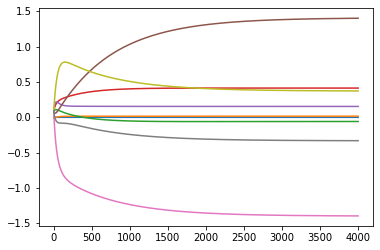

In [6]:
#首先来准备一个空list用来记录
l_theta = []

#设置步长和迭代次数
lam = 0.1
num = 4000

#初始化theta值
theta = np.mat(np.zeros((X.shape[1], 1)))

#开始迭代，注意要对照上面的公式, 如果不让for循环里变量带入计算，可以用_来表
for _ in range(num):
    grad = 2 * lam/X.shape[0] * X.T * (X*theta - Y)
    theta = theta - grad
    l_theta.append(np.ravel(theta))

plt.plot(l_theta)

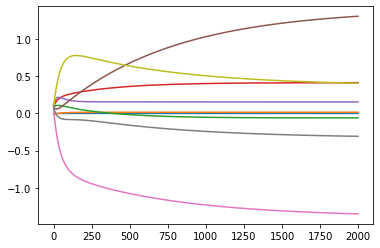

In [10]:
#写成函数
def Batch_GD(X, Y, lam = 0.1, n = 5000):
    l_theta = []
    theta = np.mat(np.zeros((X.shape[1], 1)))
    for _ in range(n):
        grad = 2 * lam/X.shape[0] * X.T*(X*theta - Y)
        theta -= grad
        l_theta.append(np.ravel(theta.copy()))
    return l_theta

#测试运行
l_theta = Batch_GD(X, Y, lam = 0.1, n = 2000)
plt.plot(l_theta)

## 3.2 Stocastic_GD

In [17]:
def Stocastic_GD(X, Y, lam = 0.1, n = 5000):
    l_theta = []
    theta = np.mat(np.zeros((X.shape[1], 1)))
    for _ in range(n):
        #在0到样本数中间随机的选取一个数
        #这个数代表的就是数据集中的行数
        j = np.random.randint(X.shape[0])
        #取出这条数据集
        X_j, Y_j = X[j], Y[j]
        grad = 2 * lam/X.shape[0] * X_j.T * (X_j * theta - Y_j)
        theta -= grad
        l_theta.append(np.ravel(theta.copy()))
    return l_theta

array([ 0.03014091, -0.00891513, -0.01527054,  0.44221847,  0.11015914,
        1.37278424, -1.43947455, -0.26427148,  0.40280763])

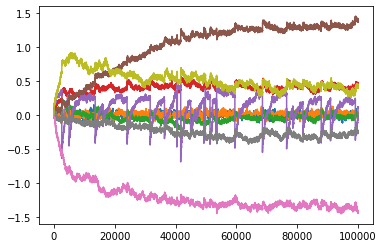

In [18]:
l_theta = Stocastic_GD(X, Y, lam = 10, n = 100000)
plt.plot(l_theta)
l_theta[-1]

## 3.3 Mini_GD

In [20]:
def Mini_GD(X, Y, lam = 0.1, n = 5000):
    l_theta = []
    theta = np.mat(np.zeros((X.shape[1], 1)))
    #将数据转为DataFrame，方便循环里面使用sample的方法
    temp_X = pd.DataFrame(X)
    for _ in range(n):
        #使用sample的方法，无放回的取出10%的数据，并且取出其索引，这个索引后面Y值也是需要用到
        X_index = temp_X.sample(frac = 0.1, replace = False).index
        #取出索引所对应的X值
        X_mini = X[X_index, :]
        #取出索引所对应的Y值
        Y_mini = Y[X_index]
        grad = 2 * lam/X.shape[0] * X_mini.T * (X_mini * theta - Y_mini)
        theta -= grad
        l_theta.append(np.ravel(theta.copy()))
    return l_theta

array([ 0.0139759 ,  0.01228992, -0.05301616,  0.40182813,  0.15847654,
        1.36977231, -1.39331966, -0.31454934,  0.37623083])

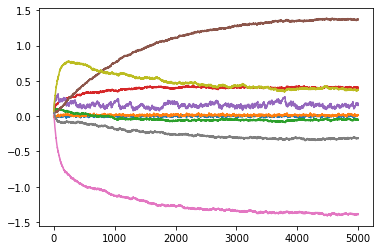

In [21]:
l_theta = Mini_GD(X, Y, lam = 0.6)
plt.plot(l_theta)
l_theta[-1]